In [54]:
# Import all the Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Model Selection
from sklearn.model_selection import train_test_split

#Models
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Model Evaluation
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('TATASTEEL.NS (1).csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568285,10242229.0
1,1996-01-02,11.172855,11.214964,10.951082,10.979155,2.520592,16954313.0
2,1996-01-03,10.979155,11.229000,10.951082,10.981962,2.521237,13514114.0
3,1996-01-04,10.807913,10.807913,10.386825,10.633863,2.441320,34785820.0
4,1996-01-05,10.504730,10.555260,10.316644,10.423319,2.392984,30138033.0


# Data Exploration

# Summarize the Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6871 entries, 0 to 6870
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6871 non-null   object 
 1   Open       6864 non-null   float64
 2   High       6864 non-null   float64
 3   Low        6864 non-null   float64
 4   Close      6864 non-null   float64
 5   Adj Close  6864 non-null   float64
 6   Volume     6864 non-null   float64
dtypes: float64(6), object(1)
memory usage: 375.9+ KB


# Descriptive Summary of Data

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6864.000000,6864.000000,6864.000000,6864.000000,6864.000000,6.864000e+03
mean,37.789490,38.398499,37.098333,37.718267,15.757361,6.982651e+07
std,29.604842,30.016965,29.104956,29.542239,19.703162,5.831510e+07
min,3.705570,3.910499,3.705570,3.775751,0.902283,0.000000e+00
25%,10.554558,10.702640,10.366472,10.504730,2.432781,3.292896e+07
50%,34.616764,35.114075,33.954185,34.530851,12.302627,5.383640e+07
75%,50.849415,51.657379,50.037729,50.813896,18.808940,8.758241e+07
max,161.486557,161.486557,161.486557,161.486557,123.550003,6.428460e+08


# Check if there were any null values

In [6]:
df.isnull().sum()

Date         0
Open         7
High         7
Low          7
Close        7
Adj Close    7
Volume       7
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Check if there were any duplicate values

In [9]:
df.duplicated().sum()

0

there is no duplicate values present in dataset

# Feature Engineering 

In [10]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568285,10242229.0
1,1996-01-02,11.172855,11.214964,10.951082,10.979155,2.520592,16954313.0
2,1996-01-03,10.979155,11.229000,10.951082,10.981962,2.521237,13514114.0
3,1996-01-04,10.807913,10.807913,10.386825,10.633863,2.441320,34785820.0
4,1996-01-05,10.504730,10.555260,10.316644,10.423319,2.392984,30138033.0


# Split Date into Year, Month and Date

In [11]:
df["Year"]=df["Date"].str[0:4]

In [12]:
df["date"]=df["Date"].str[8:10]

In [13]:
df["month_num"]=df["Date"].str[5:7]

In [14]:
def month_name(num):
    if num == "01":
        return "January"
    elif num == "02":
        return "February"
    elif num == "03":
        return "March"
    elif num == "04":
        return "April"
    elif num == "05":
        return "May"
    elif num == "06":
        return "June"
    elif num == "07":
        return "July"
    elif num == "08":
        return "August"
    elif num == "09":
        return "September"
    elif num == "10":
        return "October"
    elif num == "11":
        return "November"
    elif num == "12":
        return "December"
    else:
        return "Invalid Month"

In [15]:
df["month_name"]=df["Date"].str[5:7].apply(month_name)

In [16]:
df["Year"]=df["Year"].astype(int)
df["date"]=df["date"].astype(int)
df["month_num"]=df["month_num"].astype(int)

In [17]:
df['Date'] = pd.to_datetime(df['Date'])

# EDA

# Opening Vs Closing

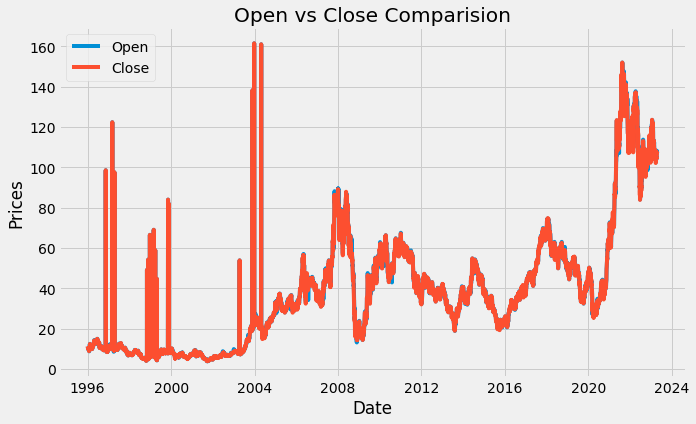

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df["Date"],y=df["Open"], label="Open")
sns.lineplot(x=df["Date"],y=df["Close"], label="Close")
plt.ylabel("Prices")
plt.title("Open vs Close Comparision")
plt.legend()


# Observations:

Opening prices were mostly higher than closing

# Prices by Date

In [21]:
sorted_df=df.sort_values(by="date")

In [22]:
sorted_df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,date,month_num,month_name
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568285,10242229.0,1996,1,1,January
4702,2014-07-01,50.495041,51.952728,50.495041,51.509705,19.121082,55762230.0,2014,1,7,July
761,1998-12-01,4.803205,5.131653,4.794783,5.081122,1.166523,61206692.0,1998,1,12,December
2948,2007-06-01,47.279709,48.072193,47.096954,47.279709,14.531234,17940414.0,2007,1,6,June
6324,2021-02-01,60.490002,64.000000,59.744999,63.610001,27.656687,210846940.0,2021,1,2,February
...,...,...,...,...,...,...,...,...,...,...,...
4476,2013-07-31,19.826448,20.741076,19.278625,20.550529,7.628629,65774010.0,2013,31,7,July
4640,2014-03-31,36.647015,37.761715,36.489815,37.533058,13.932767,73888761.0,2014,31,3,March
6551,2021-12-31,110.500000,112.349998,110.264999,111.144997,49.405617,36870210.0,2021,31,12,December
5170,2016-05-31,30.916304,32.154861,30.511391,31.854750,12.419637,105401750.0,2016,31,5,May


Text(0.5, 1.0, 'Opening Prices by Dates')

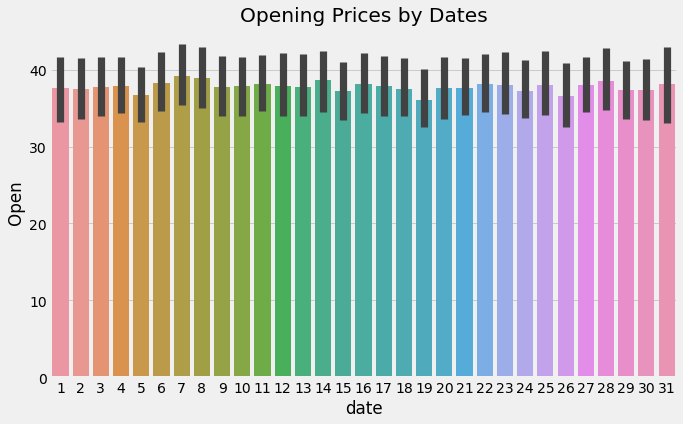

In [23]:
plt.figure(figsize=(10,6))
sns.barplot(x=sorted_df["date"],y=sorted_df["Open"])
plt.title("Opening Prices by Dates")


# Open Prices by month

In [24]:
sorted_df=df.sort_values(by="month_num")

In [25]:
sorted_df

,Date,Open,High,Low,Close,Adj Close,Volume,Year,date,month_num,month_name
0,1996-01-01,11.172855,11.214964,11.035300,11.186892,2.568285,10242229.0,1996,1,1,January
4823,2015-01-01,37.833172,38.681107,37.833172,38.533432,14.594913,26570816.0,2015,1,1,January
4600,2014-01-31,33.193344,34.098446,33.112362,33.922188,12.592364,54543855.0,2014,31,1,January
4599,2014-01-30,33.631603,33.726875,32.507374,33.017090,12.256379,58965717.0,2014,30,1,January
4598,2014-01-29,35.108345,35.189327,33.941242,34.107971,12.661330,47641329.0,2014,29,1,January
...,...,...,...,...,...,...,...,...,...,...,...
5798,2018-12-13,52.805000,52.805000,50.799999,51.224998,21.156118,68100950.0,2018,13,12,December
5799,2018-12-14,51.099998,51.779999,50.650002,51.355000,21.209812,51559800.0,2018,14,12,December
5800,2018-12-17,51.799999,52.525002,51.639999,52.400002,21.641399,48048540.0,2018,17,12,December
5802,2018-12-19,52.790001,53.244999,52.459999,52.740002,21.781820,49280430.0,2018,19,12,December


Text(0.5, 1.0, 'Opening Prices by Months')

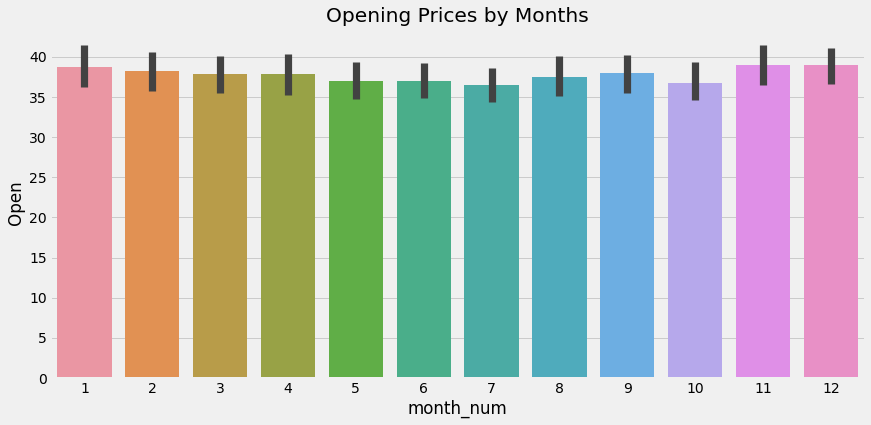

In [26]:
plt.figure(figsize=(13,6))
sns.barplot(x=sorted_df["month_num"],y=sorted_df["Open"])
plt.title("Opening Prices by Months")

We dont find such relationship between them

# Coreleation of features

<AxesSubplot:>

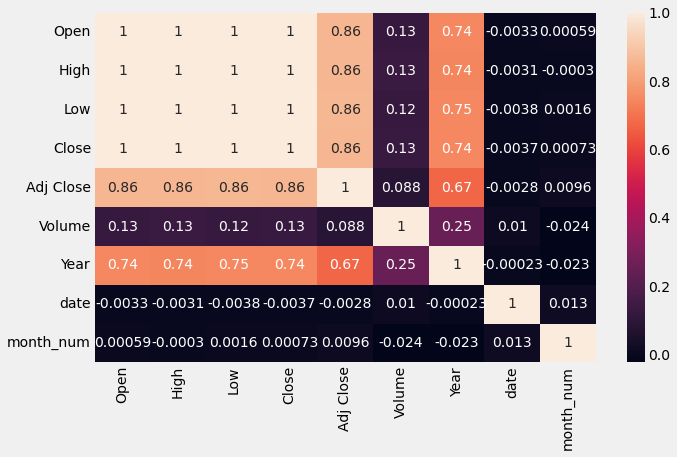

In [28]:
 plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

# Observations:

1.High, Low, Close were very similar to Open. so we can drop them
2.As it will be difficult to predict Adj close and also Volume by the user, its better to remove those also
3.As we cant use DateTime directly in ML training, remove Date also

In [29]:
df.drop(["High","Low","Close","Adj Close","Volume","Date"],axis=1,inplace=True)

In [30]:
df=df.sample(frac=1)

In [31]:
df

,Open,Year,date,month_num,month_name
2308,25.265251,2004,4,11,November
3161,63.452259,2008,7,4,April
2943,46.713764,2007,25,5,May
3128,72.884354,2008,15,2,February
2307,24.759947,2004,3,11,November
...,...,...,...,...,...
3473,36.870907,2009,21,7,July
695,5.159725,1998,31,8,August
5142,34.184189,2016,21,4,April
608,8.528426,1998,30,4,April


# Divide and Split data for model building

In [32]:
x=df.drop(["Open","month_name"],axis=1)

In [33]:
y=df["Open"]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=25,random_state=25)

# Model 1 

In [45]:
model1=AdaBoostRegressor()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)

In [47]:
r2_score(y_test,y_pred)

0.8543883623656296

# Model 2

In [48]:
model2=GradientBoostingRegressor()
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
r2_score(y_test,y_pred)

0.9755833759567898

In [51]:
mean_absolute_error(y_test,y_pred)

4.176198151281215

In [52]:
mean_absolute_percentage_error(y_test,y_pred)

0.18247238741108376